**Nama : Vincent Moswen**

**NIM : 2702299863**

**UTS Model Deployment**


No 1

Purpose : Making a machine learning model to determine whether a person is qualified or not to get a loan.

About Dataset:

a. person_age = Usia dari orang tersebut 

b. person_gender = Gender dari orang tersebut

c. person_education = Tingkat pendidikan tertinggi 

d. person_income = Pendapatan tahunan 

e. person_emp_exp = Tahun pengalaman bekerja 

f. person_home_ownership = Status kepemilikan tempat huni 

g. loan_amnt = Jumlah pinjaman yang diminta 

h. loan_intent = Tujuan dari pinjaman 

i. loan_int_rate = Suku bunga pinjaman 

j. loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan 

k. cb_person_cred_hist_length = Durasi kredit dalam tahun 

l. credit_score = Skor kredit dari orang tersebut 

m. previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya 

n. loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv('Dataset_A_loan.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


**Data Preprocessing**


Check NULL Values and Type data.

In [114]:
df = data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Ada 2250 NULL Values di person_income.

Split data numerical dan categorical

In [115]:
category = []
numerical = []

for col in df.columns:
    if df[col].dtype == 'object':
        category.append(col)
    else:
        numerical.append(col)

print(category)
print(numerical)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


Checking if there is anomaly in the data

In [116]:
for col in df.columns:
    print(f"{df[col].value_counts()}")

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
70.0        7
64.0        7
62.0        7
59.0        6
69.0        5
144.0       3
73.0        3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64
person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64
person_educatio

Ada anomaly di kolom person_gender

Fixing Anomalies in the data

In [118]:
df['person_gender'].replace('Male','male',inplace=True)
df['person_gender'].replace('fe male','female',inplace=True)

df['person_age'] = df['person_age'].astype('int64')
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype('int64')

df['person_income'].fillna(df['person_income'].mean(),inplace=True)

Detect Outlier

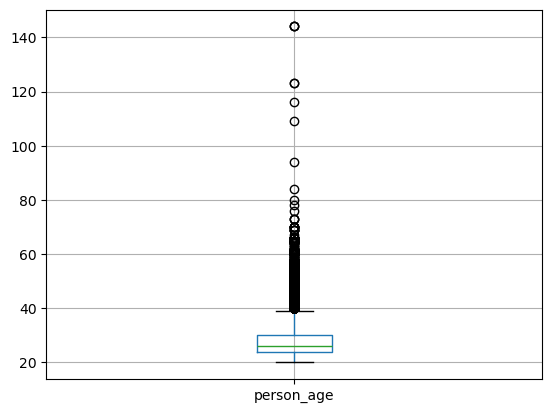

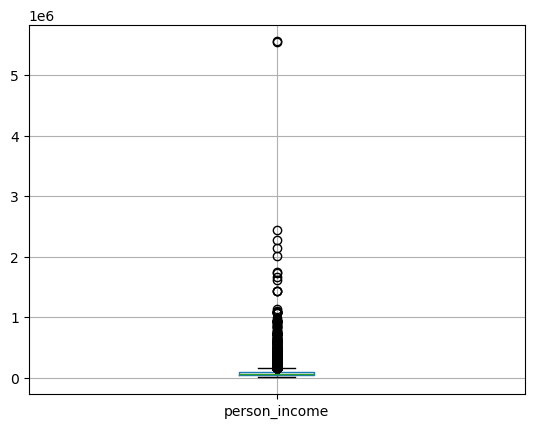

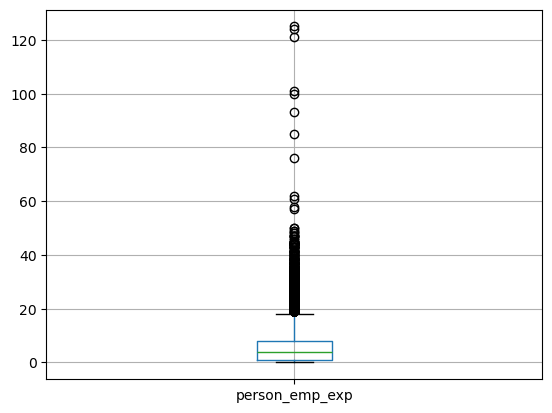

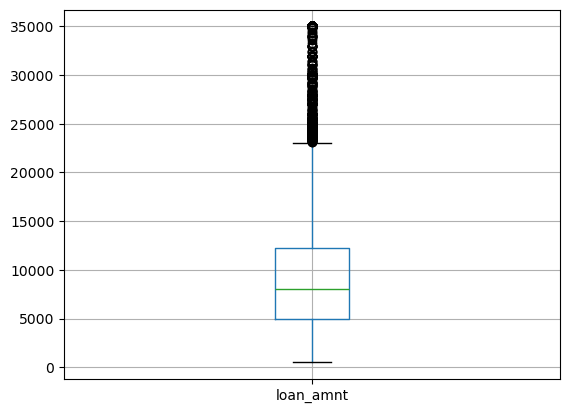

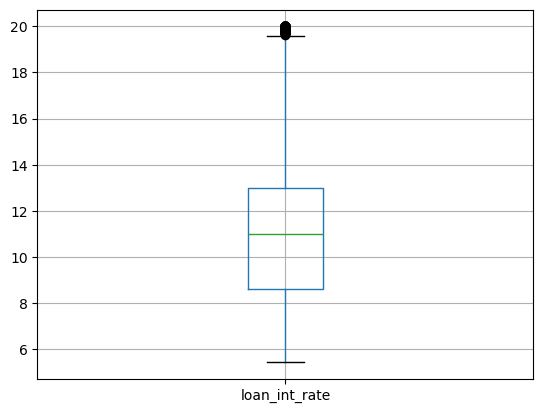

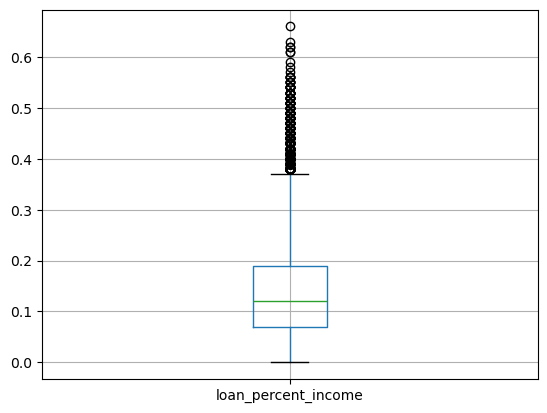

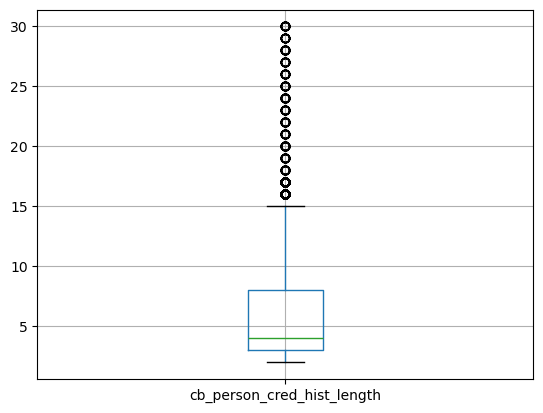

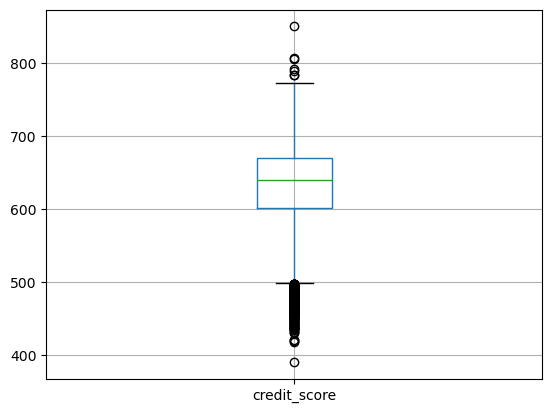

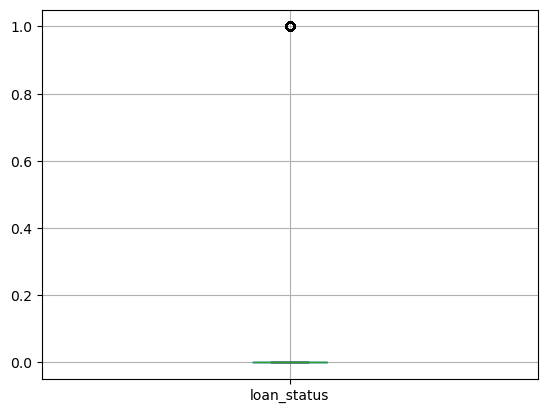

In [119]:
for col in df[numerical]:
    boxplot = df.boxplot(col)
    plt.show()

Ada banyak sekali outlier akan tetapi tidak masalah karena kita menggunakan model yang tidak rentan terhadap outlier. Jadi dibiarkan saja.

Checking correlations for numerical column to target using pearson method.

In [120]:
correlations = df[numerical].corr()
print(correlations['loan_status'].sort_values(ascending=False))

loan_status                   1.000000
loan_percent_income           0.384880
loan_int_rate                 0.332005
loan_amnt                     0.107714
credit_score                 -0.007647
cb_person_cred_hist_length   -0.014851
person_emp_exp               -0.020481
person_age                   -0.021476
person_income                -0.142890
Name: loan_status, dtype: float64


( r > 0.5 or r < -0.5) -> good correlation 

In this correlations, all the column has weak correlations to the target.

Modeling

Splitting Training and Test Dataset

In [121]:
X = df.drop(columns='loan_status',axis=1)
y = df['loan_status']

splitting target column from other column.

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Membagi data set dengan ukuran test 30% dan train 70%.

Encode

Encode using Label Encoder(column that has 2 values in it e.g female or male) and One Hot Encoder(column that has more than 2 values)

In [123]:
from sklearn.preprocessing import LabelEncoder

gender_encoded = LabelEncoder()
previous_loan_encoded = LabelEncoder()

x_train['person_gender'] = gender_encoded.fit_transform(x_train['person_gender'])
x_test['person_gender'] = gender_encoded.transform(x_test['person_gender'])

x_train['previous_loan_defaults_on_file'] = previous_loan_encoded.fit_transform(x_train['previous_loan_defaults_on_file'])
x_test['previous_loan_defaults_on_file'] = previous_loan_encoded.transform(x_test['previous_loan_defaults_on_file'])


Encode person_gender and previous_loan_defaults_on_file menjadi 0 atau 1. Yang dimana hanya x_train yang di fit dan transform x_train dan x_test.

In [124]:
from sklearn.preprocessing import OneHotEncoder

education_train = x_train[['person_education']]
ownership_train = x_train[['person_home_ownership']]
intent_train = x_train[['loan_intent']]

education_test = x_test[['person_education']]
ownership_test = x_test[['person_home_ownership']]
intent_test = x_test[['loan_intent']]

train_encoded_education=OneHotEncoder()
train_encoded_ownership=OneHotEncoder()
train_encoded_intent=OneHotEncoder()

education_train = pd.DataFrame(train_encoded_education.fit_transform(education_train).toarray(),columns=train_encoded_education.get_feature_names_out())
ownership_train = pd.DataFrame(train_encoded_ownership.fit_transform(ownership_train).toarray(),columns=train_encoded_ownership.get_feature_names_out())
intent_train = pd.DataFrame(train_encoded_intent.fit_transform(intent_train).toarray(),columns=train_encoded_intent.get_feature_names_out())

education_test = pd.DataFrame(train_encoded_education.transform(education_test).toarray(),columns=train_encoded_education.get_feature_names_out())
ownership_test = pd.DataFrame(train_encoded_ownership.transform(ownership_test).toarray(),columns=train_encoded_ownership.get_feature_names_out())
intent_test = pd.DataFrame(train_encoded_intent.transform(intent_test).toarray(),columns=train_encoded_intent.get_feature_names_out())

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train_enc = pd.concat([x_train,education_train,ownership_train,intent_train], axis=1)
x_test_enc = pd.concat([x_test,education_test,ownership_test,intent_test], axis=1)

kita bikin 3 variabel untuk tiap dataset yang berisi column yang pengen kita ubah.

kita bikin 3 variabel baru untuk menampung fit dari tiap kolom. Karena case disini kita hanya akan fit train untuk menghindari data leakage maka kita hanya buat 3 variabel.

trus kita bikin 3 variabel lagi untuk menampung dataframe dari kolom yang sudah di encoded untuk tiap dataset. 

trus kita pake function toarray() untuk mengubah data yang di transform menjadi numpy array sehingga bisa dijadikan dataframe nantinya.

trus ada function get_feature_names_out untuk mengambil key value atau nama tabel dari data fit(e.g train_encoded_education).

trus kita reset index dari dataset untuk menghindari mismatch ketika ingin di gabungkan. kenapa pakai drop=True? karena jika tidak index dari dataframe lama akan ikut terbawa dan menjadi kolom baru ketika proses reset index di jalankan.

kemudian kita bikin variabel x_train dan x_test baru yang nantinya akan diisi gabungan antara dataset original, dan column yang di encode.

In [125]:
x_train_enc

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,28,0,Associate,51613.000000,5,RENT,6000.0,VENTURE,11.78,0.12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,42,0,Associate,137767.000000,17,MORTGAGE,19200.0,PERSONAL,11.36,0.14,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,35,0,Bachelor,52574.000000,13,RENT,6150.0,MEDICAL,9.07,0.12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,21,0,Master,55083.000000,0,MORTGAGE,5000.0,EDUCATION,7.14,0.09,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,0,Associate,112215.000000,3,MORTGAGE,6000.0,PERSONAL,11.00,0.05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31495,40,1,Doctorate,80182.226222,13,MORTGAGE,5000.0,PERSONAL,5.42,0.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31496,28,0,Associate,36633.000000,5,RENT,5200.0,PERSONAL,5.42,0.14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31497,29,0,Bachelor,39466.000000,6,RENT,6525.0,EDUCATION,16.07,0.17,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
31498,27,1,High School,53580.000000,4,RENT,13650.0,DEBTCONSOLIDATION,10.65,0.25,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Drop the original column as it has already been encoded dan drop colo

In [126]:
x_train_enc = x_train_enc.drop(columns=['person_education','person_home_ownership','loan_intent'],axis=1)
x_test_enc = x_test_enc.drop(columns=['person_education','person_home_ownership','loan_intent'],axis=1)

In [127]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Rf = RandomForestClassifier(criterion = 'gini',max_depth = 4)
Rf.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

In [128]:
Rf_predict = Rf.predict(x_test_enc)

In [129]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, Rf_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10533
           1       0.97      0.59      0.73      2967

    accuracy                           0.90     13500
   macro avg       0.93      0.79      0.84     13500
weighted avg       0.91      0.90      0.90     13500



Classification Report Random Forest :

Loan Ditolak(0):

Precision : 89% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 89% nya benar.

Recall : 99% -> Model menangkap 99% kasus loan_status ditolak yang ada.

F1-Score : 94% -> Keseimbangan antara precision dan recall. Dalam kasus ini F1-Score seimbang.

Loan Diterima(1):

Precision : 97% -> Presisi dari kategori ini sudah sangat tinggi yaitu 97%, yang berarti dari seluruh tebakan 95% benar.

Recall : 59% -> Model menangkap 59% loan_status diterima yang ada.

F1-Score : 73% -> Keseimbangan antara precision dan recall kurang bagus karena recall nilainya rendah.

Accuracy : 90%

Tuning HyperParameter for Random Forest using GridSearchCV

Searching the best parameters

In [130]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[24,36,48,60]
}


Mencari best parameter dari parameter yang sudah ditulis diatas. Diantaranya akan dipilih salah satu yang terbaik untuk dijadikan best parameter.

In [131]:
Rf_tuned = RandomForestClassifier()
Rf_tuned = GridSearchCV(Rf_tuned ,
                            param_grid = rf_params,   
                            scoring='accuracy',        
                            cv=5)  

Menggunakan GridSearchCV untuk mencari kombinasi dari semua parameter yang telah kita input di atas(rf_params)

In [132]:
Rf_tuned.fit(x_train_enc,y_train)
print("Tuned Hyperparameters :", Rf_tuned.best_params_)
print("Accuracy :",Rf_tuned.best_score_)

Tuned Hyperparameters : {'criterion': 'log_loss', 'max_depth': 60}
Accuracy : 0.9265396825396826


Menampilkan best_parameter yang didapatkan dari proses GridSearchCV

Train another Random Forest Model but using the best parameter.

In [133]:
best_rf_params = Rf_tuned.best_params_
Rf_best = RandomForestClassifier(**best_rf_params)
Rf_best.fit(x_train_enc, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=60)

Memasukan Best Parameter yang sudah dicari tadi dan memasukannya lagi ke model.

In [134]:
Rf_predict_best = Rf_best.predict(x_test_enc)

In [135]:
print('\nClassification Report\n')
print(classification_report(y_test, Rf_predict_best))


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10533
           1       0.90      0.76      0.82      2967

    accuracy                           0.93     13500
   macro avg       0.92      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500



Classification Report Random Forest Tuned :

Loan Ditolak(0):

Precision : 94% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 94% nya benar.

Recall : 98% -> Model menangkap 98% kasus loan_status ditolak yang ada.

F1-Score : 96% -> Keseimbangan antara precision dan recall. Dalam kasus ini F1-Score seimbang.

Loan Diterima(1):

Precision : 90% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 90% nya benar.

Recall : 76% -> Model menangkap 75% loan_status diterima yang ada.

F1-Score : 82% -> Keseimbangan antara precision dan recall lumayan bagus.

Accuracy : 93%

Modeling XGboost

In [136]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss',max_depth=4)

xgb.fit(x_train_enc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [137]:
xgb_pred = xgb.predict(x_test_enc)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10533
           1       0.89      0.80      0.84      2967

    accuracy                           0.93     13500
   macro avg       0.92      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500



Classification Report XGBoost :

Loan Ditolak(0):

Precision : 95% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 95% nya benar.

Recall : 97% -> Model menangkap 97% kasus loan_status ditolak yang ada.

F1-Score : 96% -> Keseimbangan antara precision dan recall. Dalam kasus ini F1-Score seimbang.

Loan Diterima(1):

Precision : 89% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 89% nya benar.

Recall : 80% -> Model menangkap 80% loan_status diterima yang ada.

F1-Score : 84% -> Keseimbangan antara precision dan recall lumayan bagus.

Accuracy : 93%

Searching best parameters for XGBoost

In [138]:
xgb_params = {
    'max_depth': [12, 24, 36, 48],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [150, 200, 250, 300]
}

max depth kita ambil range 12,24,36,dan 48 karena jika terlalu tinggi nilainya takut kena overfitting.

Mencari best parameter dari parameter yang sudah di input diatas.

In [139]:
xgb_tuned = XGBClassifier()
xgb_tuned = GridSearchCV(xgb_tuned,
                        param_grid=xgb_params,
                        scoring='accuracy',
                        cv=5
                        )

Mencari kombinasi dari seluruh parameter yang telah di input

In [140]:
xgb_tuned.fit(x_train_enc,y_train)

print("Tuned Hyperparameters :", xgb_tuned.best_params_)
print("Accuracy :",xgb_tuned.best_score_)

Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 48, 'n_estimators': 250}
Accuracy : 0.9306666666666666


menampilkan best parameter dari kombinasi yang telah dicari di GridSearchCV

In [141]:
xgb_best_params = xgb_tuned.best_params_
xgb_best = XGBClassifier(**xgb_best_params)

xgb_best.fit(x_train_enc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=48,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

pake **xgb_best_params -> ** ini buat membaca parameter satu".

In [142]:
xgb_best_pred = xgb_best.predict(x_test_enc)
print(classification_report(y_test,xgb_best_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10533
           1       0.88      0.81      0.84      2967

    accuracy                           0.93     13500
   macro avg       0.91      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500



Classification Report XGBoost Tuned:

Loan Ditolak(0):

Precision : 95% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 95% nya benar.

Recall : 97% -> Model menangkap 97% kasus loan_status ditolak yang ada.

F1-Score : 96% -> Keseimbangan antara precision dan recall. Dalam kasus ini F1-Score seimbang.

Loan Diterima(1):

Precision : 88% -> Presisi dari kategori ini sudah sangat tinggi yang dimana dari seluruh tebakan 88% nya benar.

Recall : 81% -> Model menangkap 81% loan_status diterima yang ada.

F1-Score : 84% -> Keseimbangan antara precision dan recall lumayan bagus.

Accuracy : 93%

Dari seluruh model yang telah dibuat, model yang paling stabil dan bagus adalah XGBoost yang telah di hyerparameter tuning. Karena jika kita liat dari precision, recall, dan F1-Score yang paling stabil adalah XGBoost yang telah di hyperparameter tuning, meskipun performa XGBoost dan XGBoost Hyperparameter Tuning mirip. Namun, performa XGBoost yang sudah di Hyperparameter Tuning sedikit lebih baik dari XGBoost biasa, sehingga model terbaik adalah XGBoost with Hyperparameter Tuning.

Menyimpan file Pickle dari semua encoded dan best model.

In [143]:
import pickle as pkl

pkl.dump(xgb_best, open('XGBoost_Tuned.pkl', 'wb'))

In [144]:
pkl.dump(gender_encoded,open('gender_encode.pkl','wb'))
pkl.dump(previous_loan_encoded,open('previous_loan.pkl','wb'))
pkl.dump(train_encoded_education,open('education_encode.pkl','wb'))
pkl.dump(train_encoded_ownership,open('ownership_encode.pkl','wb'))
pkl.dump(train_encoded_intent,open('intent_encode.pkl','wb'))